# Análise de Gorjetas

In [5]:
# A empresa deseja estabelecer as relações dos dados com base nas gorjetas.
# Existe relação entre o valor das contas pagas com o valor dado das gorjetas?
# Os clientes que compram sobremesas dão mais gorjetas?
# Quais dias da semana tem mais gorjetas?
# Será que a hora do dia influencia na gorjeta?

In [47]:
# Importanto as bibliotecas
import pandas as pd
!pip install seaborn==0.9.0
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums

In [7]:
# Importando os dados
dados = pd.read_csv('tips_atualizado.csv')

In [8]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [9]:
# Traduzindo as colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [10]:
renomear = {'total_bill' : 'valor_da_conta', 
            'tip' : 'gorjeta', 
            'dessert' : 'sobremesa', 
            'day' : 'dia_da_semana', 
            'time' : 'hora_do_dia', 
            'size' : 'quantidade_de_pessoas'}

In [11]:
gorjetas = dados.rename(columns = renomear)

In [12]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,quantidade_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [13]:
# Traduzindo os resultados
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
nao_sim = {'No' : 'Não', 
           'Yes' : 'Sim'}

In [15]:
gorjetas.sobremesa.map(nao_sim)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [16]:
gorjetas.sobremesa = gorjetas.sobremesa.map(nao_sim)

In [17]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [18]:
dias = {'Sun' : 'Domingo', 
        'Sat' : 'Sábado', 
        'Thur' : 'Quinta', 
        'Fri' : 'Sexta'
}

In [19]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
horas = {'Dinner' : 'Jantar', 
         'Lunch' : 'Almoço' 
}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(horas)

In [23]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,quantidade_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
5,25.29,4.71,Não,Domingo,Jantar,4
6,8.77,2.00,Não,Domingo,Jantar,2
7,26.88,3.12,Não,Domingo,Jantar,4
8,15.04,1.96,Não,Domingo,Jantar,2
9,14.78,3.23,Não,Domingo,Jantar,2


In [24]:
# Verificando registros nulos
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 3416 registros 

Registros não nulos


valor_da_conta           3416
gorjeta                  3416
sobremesa                3416
dia_da_semana            3416
hora_do_dia              3416
quantidade_de_pessoas    3416
dtype: int64

In [25]:
# Criando a coluna porcentagem
gorjetas['porcentagem'] = gorjetas['valor_da_conta'] / gorjetas['gorjeta']
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,quantidade_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,16.82
1,10.34,1.66,Não,Domingo,Jantar,3,6.23
2,21.01,3.50,Não,Domingo,Jantar,3,6.00
3,23.68,3.31,Não,Domingo,Jantar,2,7.15
4,24.59,3.61,Não,Domingo,Jantar,4,6.81
5,25.29,4.71,Não,Domingo,Jantar,4,5.37
6,8.77,2.00,Não,Domingo,Jantar,2,4.38
7,26.88,3.12,Não,Domingo,Jantar,4,8.62
8,15.04,1.96,Não,Domingo,Jantar,2,7.67
9,14.78,3.23,Não,Domingo,Jantar,2,4.58


## Análise 1 - Existe relação entre o valor das contas pagas com o valor dado das gorjetas?

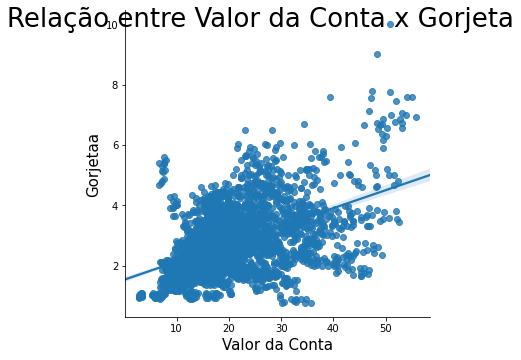

In [27]:
analise1 = sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', data=gorjetas)
analise1.fig.suptitle('Relação entre Valor da Conta x Gorjeta', fontsize=26)
analise1.set_xlabels('Valor da Conta', fontsize=15)
analise1.set_ylabels('Gorjetaa', fontsize=15)


In [117]:
type(analise1)

matplotlib.axes._subplots.AxesSubplot

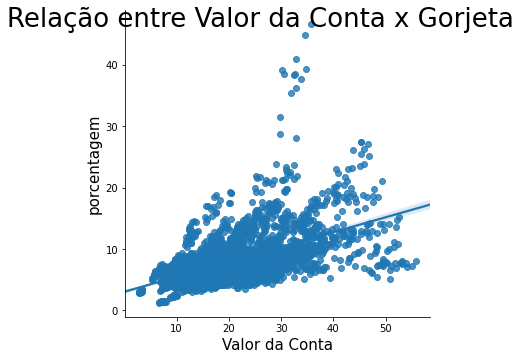

In [32]:
porcentagem_conta = analise1 = sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data=gorjetas)
analise1.fig.suptitle('Relação entre Valor da Conta x Gorjeta', fontsize=26)
analise1.set_xlabels('Valor da Conta', fontsize=15)
analise1.set_ylabels('porcentagem', fontsize=15)

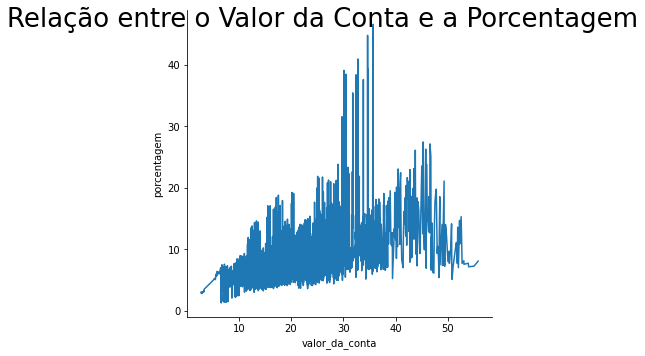

In [36]:
porcentagem_conta1 = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)
porcentagem_conta1.fig.suptitle('Relação entre o Valor da Conta e a Porcentagem', fontsize=26)
analise1.set_xlabels('Valor da Conta', fontsize=15)
analise1.set_ylabels('porcentagem', fontsize=15)

In [37]:
# Existe uma relação entre o valor da conta e as gorjetas. Um bom caminho para beneficiar os funcionários seria sugerir
# a eles que tanto mais vendessem itens de consumo, mais eles lucariam

## Análise 2 - Os clientes que compram sobremesa pagam contas mais caras?

In [39]:
# Quanos consomem sobremesas
gorjetas[gorjetas.sobremesa == 'Sim'].describe() .round(2)

,valor_da_conta,gorjeta,quantidade_de_pessoas,porcentagem
count,1302.00,1302.00,1302.00,1302.00
mean,20.80,2.71,2.41,8.65
std,9.90,1.16,0.81,5.39
min,2.80,0.77,1.00,1.23
25%,13.50,1.91,2.00,5.29
50%,17.92,2.43,2.00,6.81
75%,26.81,3.33,3.00,10.79
max,55.80,10.00,5.00,46.62


In [40]:
# Quanos não consomem sobremesas
gorjetas[gorjetas.sobremesa == 'Não'].describe() .round(2)

,valor_da_conta,gorjeta,quantidade_de_pessoas,porcentagem
count,2114.00,2114.00,2114.00,2114.00
mean,19.22,2.71,2.67,7.36
std,8.32,1.02,1.01,2.66
min,6.53,0.91,1.00,2.99
25%,13.28,1.93,2.00,5.62
50%,17.74,2.61,2.00,6.86
75%,22.75,3.28,3.00,8.29
max,53.09,9.00,6.00,23.82


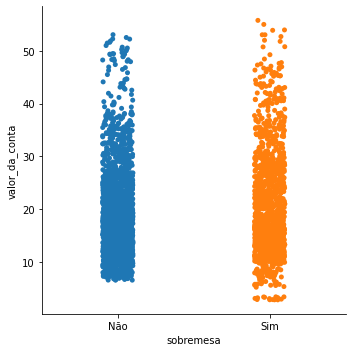

In [42]:
sns.catplot(x='sobremesa', y='valor_da_conta', data=gorjetas)

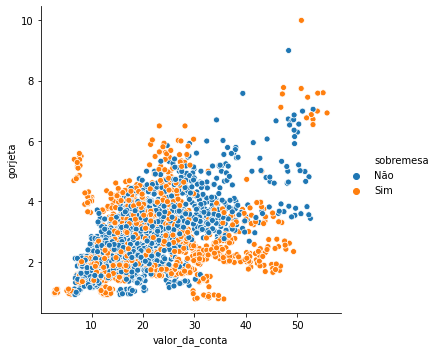

In [43]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

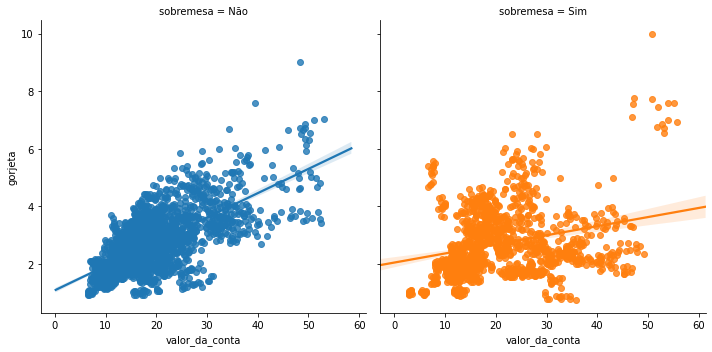

In [44]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

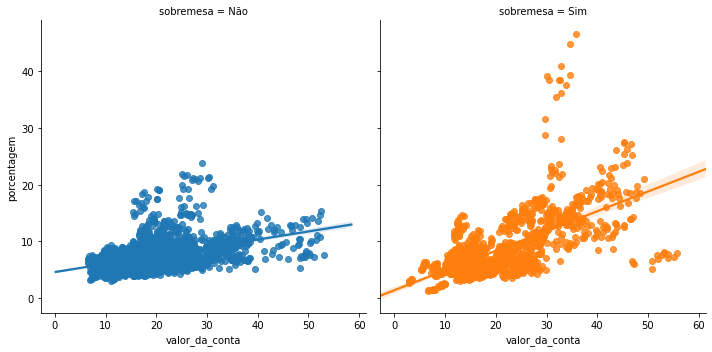

In [45]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

In [46]:
## Teste de Hiótese
#Hipótese Nula: A distribuição das gorjetas são iguais nos dois grupos - os que compram e os que não compram sobremesas
#Hipótese Alternativa:  A distribuição da taxa da gorjeta não é a mesma nos dois grupos

In [49]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [51]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.035932853520705445


In [52]:
#  Nossa hipótese alternativa de que a taxa de gorjetas não é igual nos dois grupos. Faz diferença na gorjeta, comprar ou não
# sobremesas

## Análise 3 - Quais dias da semana tem mais gorjetas?

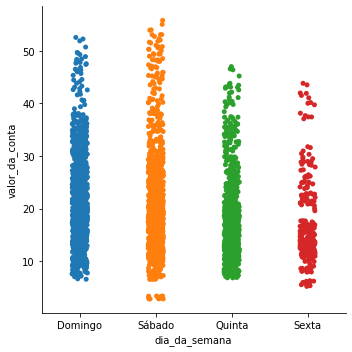

In [53]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

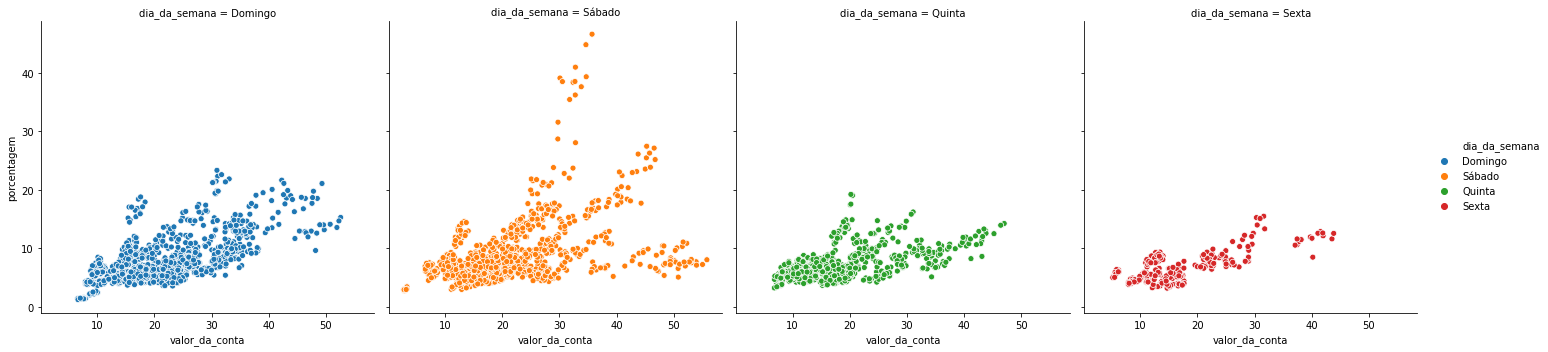

In [54]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [55]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

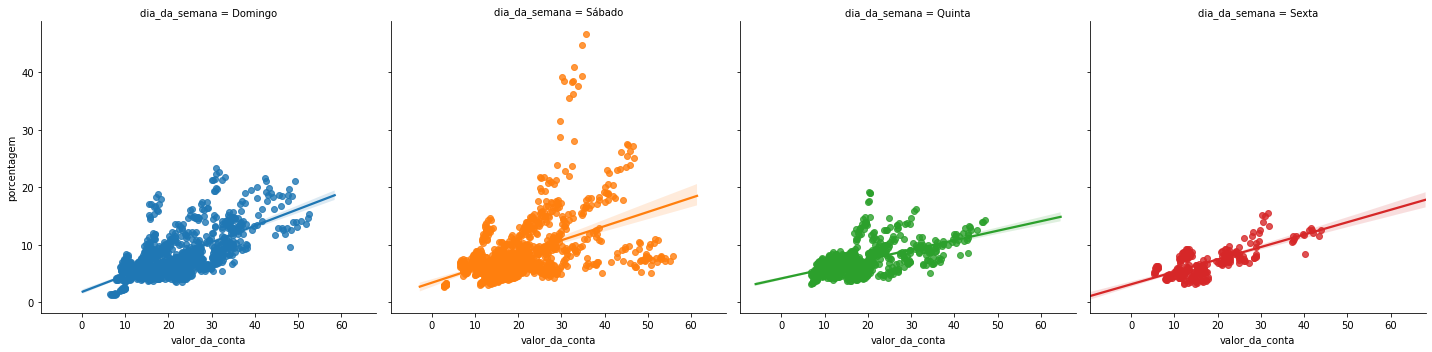

In [56]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [61]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
media_geral_gorjetas
print('A média geral das gorjetas é de {:.2f}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.71


In [62]:
gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,quantidade_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.439133,2.902079,2.842105,7.995545
Quinta,17.724088,2.556177,2.451613,7.114435
Sexta,17.215616,2.549960,2.105263,6.873910
Sábado,20.480249,2.690114,2.517241,8.462118


In [63]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,7.995545
Quinta,17.724088,2.556177,7.114435
Sexta,17.215616,2.549960,6.873910
Sábado,20.480249,2.690114,8.462118


In [66]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

In [67]:
# Hipótese nula: valor da conta é igual no sábado e no domingo
# Hipótese alternativa> valor da conta não é igual no sábado e no domingo

In [68]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [69]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=3.512690684754087, pvalue=0.0004435935681441821)

In [70]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0004435935681441821


In [71]:
# Hipótese alternativa, o valor da conta, não é igual de sábado e domingo.
# Os dias com mais gorjetas são sábado e domingo. Sendo o sábado o melhor dia. 
# Quem disse que trablhar final de semana é ruim? (rsrs)

## Análise 4 - Será que a hora do dia influencia na gorjeta?

In [72]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

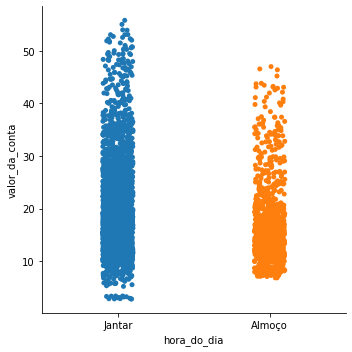

In [73]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

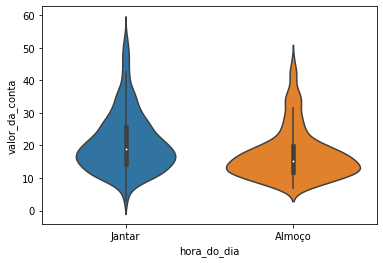

In [74]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

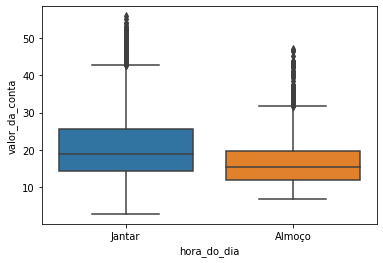

In [75]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [76]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

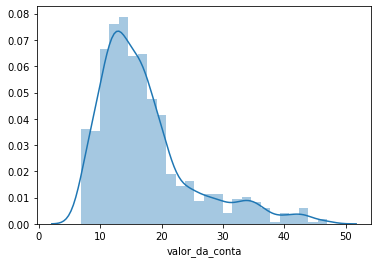

In [77]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

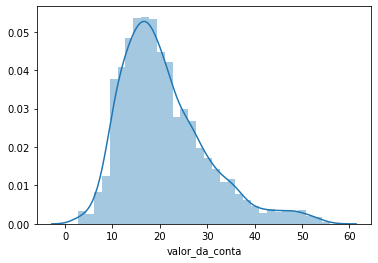

In [78]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
sns.distplot(jantar)

In [79]:
gorjetas.groupby(['hora_do_dia']).mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000018FDAD6C520>>

In [80]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,6.968687
Jantar,20.832954,2.779458,8.191445


In [86]:
# Teste de hipótese. 
# A hipótese nula: A distribuição é igual no almoço e no jantar
# Hipótese alternativa: A distribuição é diferente no almoço e no jantar
r2 = ranksums(jantar, almoco)
r2

RanksumsResult(statistic=12.158511455786174, pvalue=5.169201062207143e-34)

In [83]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [84]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=-6.813343764512593, pvalue=9.535590974327268e-12)

In [85]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 9.535590974327268e-12


In [87]:
# A distribuição é igual no almoço e no jantar

In [ ]:
# É necessário melhorar as vendas nos dias de quinta e sexta, talvez oferecendo promoções. Seria bom aumentar o portfólio de 
# sobremesas já que influenciam no valor das gosjetas. Os garçons que oferecem mais produtos, conseguem maiores gorjetas,
# já que há uma relação entre o valor da conta e as gorjetas. Ao invés disso, constatamos que não importa se almoço ou jantar,
# as gorhetas acompanham.